In [2]:
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")

# 行数・列数を確認
print("Data shape:", df.shape)

# データ型や欠損状況を確認
print(df.info())




Data shape: (891, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


# 基本統計量
平均、中央値、最頻値、分散、標準偏差、範囲、 四分位数、相関係数

In [4]:
# 基本統計量の確認
print(df.describe(include='all'))

        PassengerId    Survived      Pclass                     Name   Sex  \
count    891.000000  891.000000  891.000000                      891   891   
unique          NaN         NaN         NaN                      891     2   
top             NaN         NaN         NaN  Braund, Mr. Owen Harris  male   
freq            NaN         NaN         NaN                        1   577   
mean     446.000000    0.383838    2.308642                      NaN   NaN   
std      257.353842    0.486592    0.836071                      NaN   NaN   
min        1.000000    0.000000    1.000000                      NaN   NaN   
25%      223.500000    0.000000    2.000000                      NaN   NaN   
50%      446.000000    0.000000    3.000000                      NaN   NaN   
75%      668.500000    1.000000    3.000000                      NaN   NaN   
max      891.000000    1.000000    3.000000                      NaN   NaN   

               Age       SibSp       Parch  Ticket        Fare 

# 欠損値と外れ値の処理

In [6]:
# 欠損値の数を集計
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


### 欠損値を処理してみる

In [8]:
# Cabin列の欠損が多いので、この列を削除
df.drop(columns=["Cabin"], inplace=True)

# Age の欠損値を中央値で埋める
df["Age"] = df["Age"].fillna(df["Age"].median())

# Embarked の欠損値を最頻値で埋める
df["Embarked"] = df["Embarked"].fillna(df["Embarked"].mode()[0])

### 外れ値の検出・処理(Ageの外れ値)

#### IQR
データの中央50%の範囲  
下限=Q1−1.5×IQR  
上限=Q3+1.5×IQR 
下限、上限を超える値は外れ値とする

In [10]:
import numpy as np

# Age列の外れ値を検出してみる
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 外れ値に該当するデータ数を確認
outliers = df[(df['Age'] < lower_bound) | (df['Age'] > upper_bound)]
print("Number of outliers in Age:", len(outliers))

# 外れ値をどう扱うかはケースバイケース
# 例: 外れ値を切り捨てる or 上下限にクリップする
df['Age'] = np.where(df['Age'] < lower_bound, lower_bound, df['Age'])
df['Age'] = np.where(df['Age'] > upper_bound, upper_bound, df['Age'])


Number of outliers in Age: 66


# 単変量分析 (Univariate Analysis)
特定の列(特微量)を単独で分析する方法。

### 数値変数の分析
例: 性別×生存率  
histplot で数値データの分布を可視化
kde=True を指定するとカーネル密度推定曲線を重ね描きできます

### カーネル密度推定曲線(KDE)
ヒストグラムは ビン（区間）の数や範囲の選び方によって形が変わる  
KDE を使うと、データの分布をよりスムーズな曲線で表現 でき、外れ値やピークの形状をより正確に可視化できます。

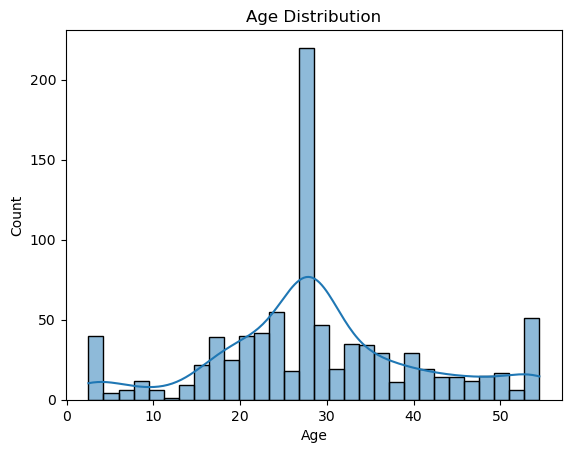

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Age のヒストグラム
sns.histplot(df['Age'], bins=30, kde=True)
plt.title("Age Distribution")
plt.show()


### カテゴリ変数の分布

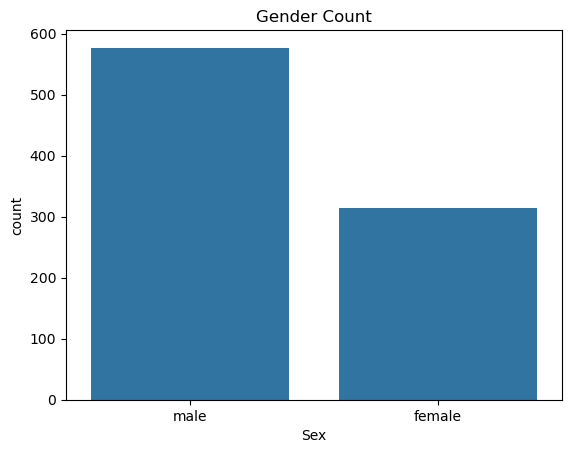

In [15]:
# Sex 列のカウントプロット
sns.countplot(x='Sex', data=df)
plt.title("Gender Count")
plt.show()

# 二変量・多変量分析(Bivariate / Multivariate Analysis)

### カテゴリ×ターゲット
性別×生存率  
groupby して .mean() をとることでカテゴリごとの平均生存率を計算  
barplot で差を直感的に把握  
※エラーバー：データのばらつきや信頼区間 を示すための指標。長いとデータのばらつきが大きい

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


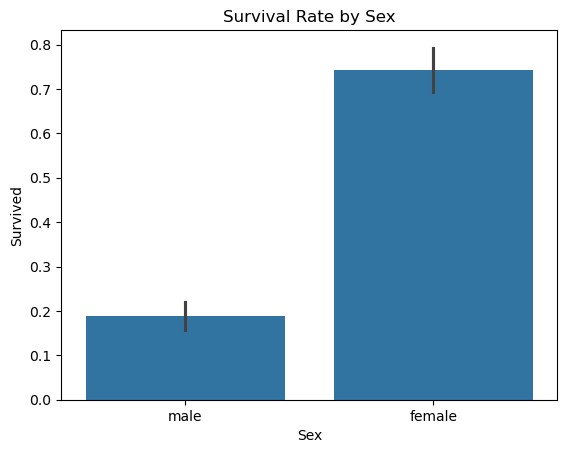

In [18]:
# 性別ごとの生存率
survival_by_sex = df.groupby('Sex')['Survived'].mean()
print(survival_by_sex)

sns.barplot(x='Sex', y='Survived', data=df)
plt.title("Survival Rate by Sex")
plt.show()


### 数値×ターゲット
年齢×生存率  


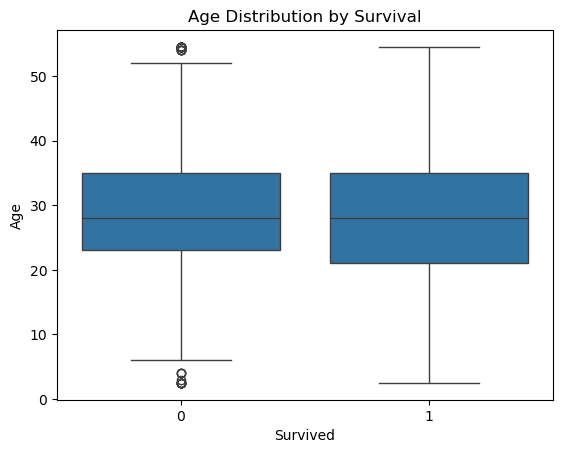

In [20]:
sns.boxplot(x='Survived', y='Age', data=df)
plt.title("Age Distribution by Survival")
plt.show()


### 数値×数値
Fare vs Age  
hue='Survived' を指定すると、生存状況による色分けができ、分布の差を視覚的に把握できる

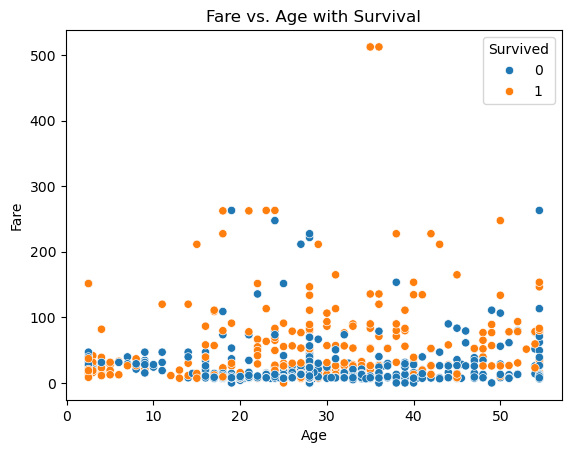

In [22]:
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=df)
plt.title("Fare vs. Age with Survival")
plt.show()


### 多変量分析
pairplot は選択した数値変数同士の散布図行列とヒストグラムを一度に描画

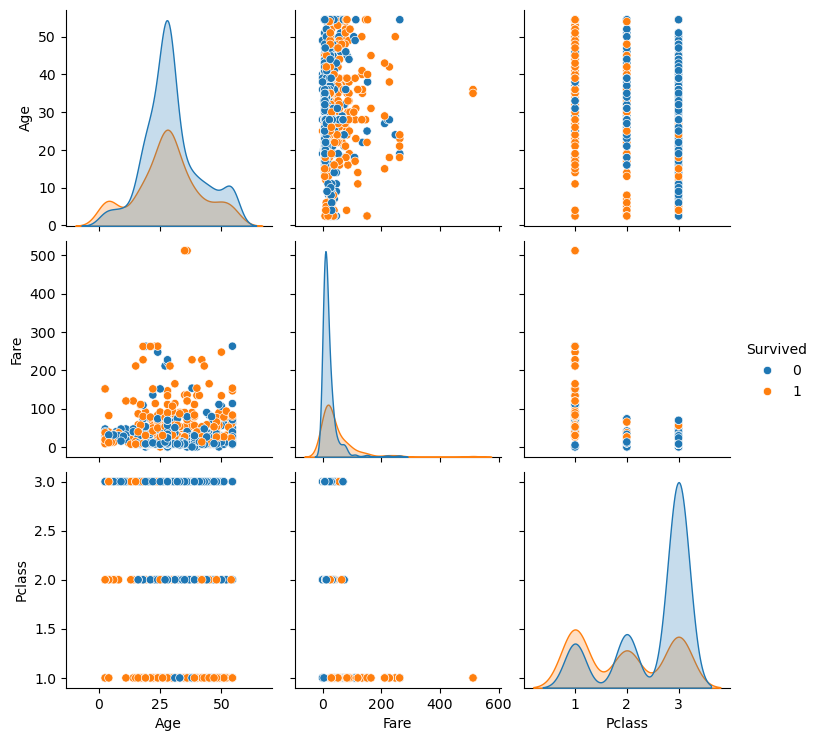

In [24]:
sns.pairplot(df[["Survived","Age","Fare","Pclass"]], hue="Survived")
plt.show()


# 特微量エンジニアリング

### カテゴリ変数のエンコーディング
カテゴリ変数を数値化

In [27]:
from sklearn.preprocessing import LabelEncoder

le_sex = LabelEncoder()
df["Sex"] = le_sex.fit_transform(df["Sex"])  # Male -> 1, Female -> 0 など

le_embarked = LabelEncoder()
df["Embarked"] = le_embarked.fit_transform(df["Embarked"])

### 新しい特微量の作成
Name から敬称（Mr, Mrs, Missなど）を抽出して特徴量にする  
FamilySize = SibSp + Parch + 1 など、同乗家族数を特徴量にする

In [29]:
# Name から敬称を抽出
def extract_title(name):
    return name.split(",")[1].split(".")[0].strip()

df["Title"] = df["Name"].apply(extract_title)


# 家族数の特徴量
df["FamilySize"] = df["SibSp"] + df["Parch"] + 1


# 相関分析（Correlation Analysis）
相関分析 とは、2つの変数の関係を数値化する方法。  
変数同士がどの程度関係しているかを 相関係数で表す。
-1 から +1 の範囲をとる  
・+1 に近い → 強い正の相関（一方が増えると、もう一方も増える）  
・-1 に近い → 強い負の相関（一方が増えると、もう一方が減る）  
・0 に近い → 相関なし  


### 相関行列を可視化(ヒートマップ)


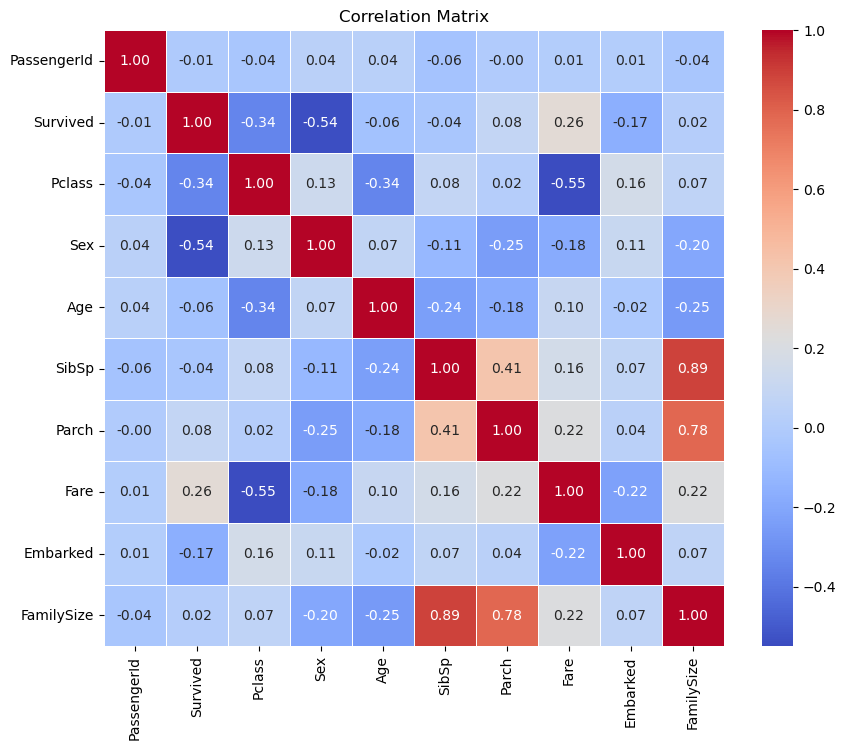

In [32]:
# 数値データのみを選択
numeric_df = df.select_dtypes(include=["number"])

# 相関行列の計算
corr_matrix = numeric_df.corr()

# ヒートマップの描画
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

### 主成分分析(PCA: Principal Component Analysis)
高次元データを少ない次元に圧縮するための手法  
目的
1.データの次元を削減 → 計算コストを削減し、可視化しやすくする  
2.相関が強い特徴量を統合 → 情報の損失を最小限にしつつ、冗長なデータを削除  
3.データのパターンを分析 → クラスが分離できるか確認する  
PCAのステップ
1.データを 標準化（平均 0, 分散 1 に変換）  
2.共分散行列を計算     
3.固有ベクトル・固有値を計算（データの方向を決める）  
4.主成分（PC1, PC2, ...）を取得し、新しい軸に変換  
5.上位の成分のみを保持し、次元削減  

### 共分散行列
データの各特徴量（変数）同士の関係を表す行列
共分散が正 → X が増えると Y も増える（正の相関）  
共分散が負 → X が増えると Y は減る（負の相関）  
変数が強く関連している場合、共分散の値が大きくなる
### 固有ベクトルと固有値
行列Aを掛けても向きが変わらないベクトル𝑣が固有ベクトル  
変化の大きさ（スカラー）が固有値𝜆  
### 主成分とは
データの 最もばらつきが大きい方向 を示すベクトル  
情報の損失を最小限に抑えながら次元削減 するための軸

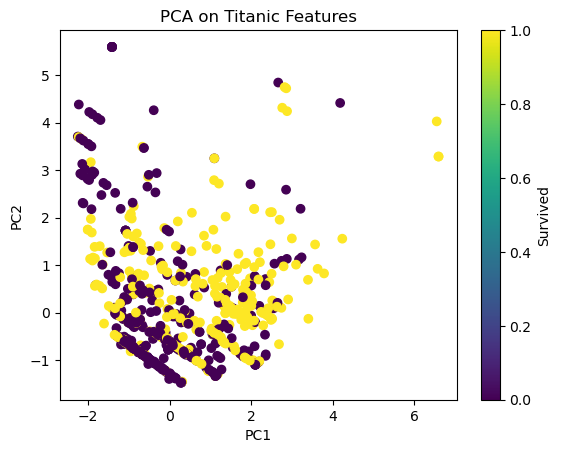

In [34]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 数値列だけ抽出（Survivedはターゲットなので除く）
features = ["Age", "Fare", "Pclass", "SibSp", "Parch"]
X = df[features].dropna()  # 欠損を除外

# 標準化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCAで2次元に圧縮
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# 結果を可視化
plt.scatter(X_pca[:,0], X_pca[:,1], c=df["Survived"].loc[X.index], cmap="viridis")
plt.colorbar(label="Survived")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA on Titanic Features")
plt.show()


# 自動分析ツール

###  pandas-profiling / ydata-profiling
自動で EDA レポートを生成できる。  


In [37]:
from ydata_profiling import ProfileReport

profile = ProfileReport(df, title="Titanic Data Report", explorative=True)
profile.to_file("titanic_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# Sweetviz

In [39]:
import sweetviz as sv

report = sv.analyze(df)
report.show_html("sweetviz_report.html")


                                             | | [  0%]   00:00 -> (? le

Report sweetviz_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


0:78: execution error: ファイル“不特定のオブジェクト”が見つかりませんでした。 (-43)
69:77: execution error: application "chrome"を取り出すことはできません。 (-1728)
70:78: execution error: application "firefox"を取り出すことはできません。 (-1728)
